In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test=pd.read_csv(r"C:\Users\ASUS\Downloads\test.csv")

In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df_test.duplicated().any()

False

In [10]:
df.shape

(891, 12)

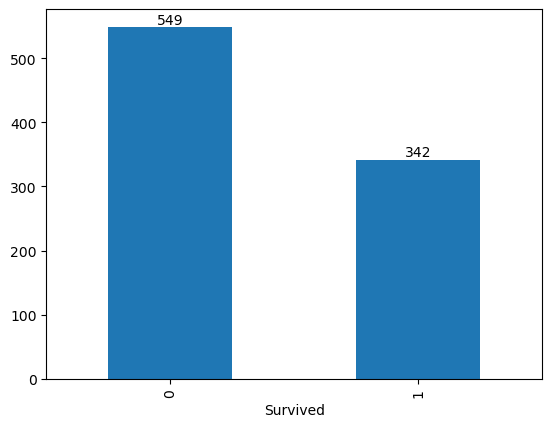

In [11]:
ax=df['Survived'].value_counts().plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

In [12]:
!pip install scikit-learn

In [13]:
!pip install imblearn

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df['Cabin'].nunique()

147

<Axes: >

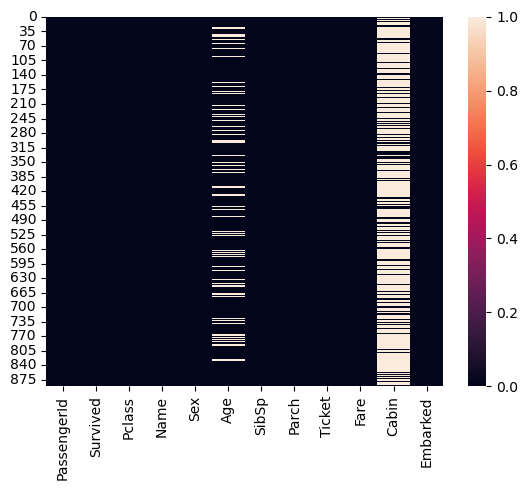

In [17]:
sns.heatmap(df.isnull())

In [18]:
df[pd.isnull(df['Age']) & pd.isnull(df['Cabin'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [19]:
df['Cabin']=df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [20]:
df['Cabin'].value_counts()

Cabin
0    687
1    204
Name: count, dtype: int64

In [21]:
from sklearn.impute import KNNImputer

In [22]:
k=KNNImputer(n_neighbors=3)

In [23]:
df['Age']=k.fit_transform(df[['Age']])

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,C


In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(889, 12)

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

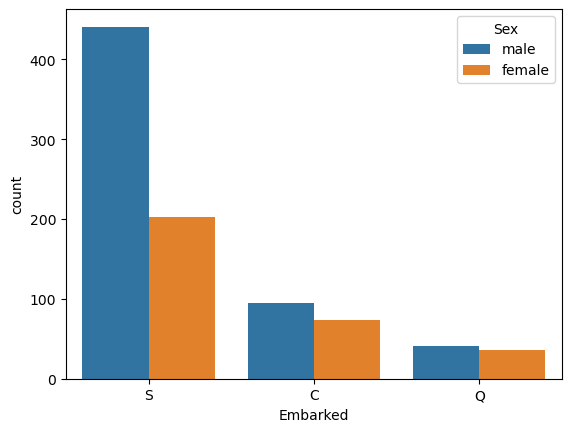

In [30]:
sns.countplot(x='Embarked',data=df,hue='Sex')

In [31]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '36973', '347088', 'PC 17605', '2661', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./C

<Axes: xlabel='Survived', ylabel='count'>

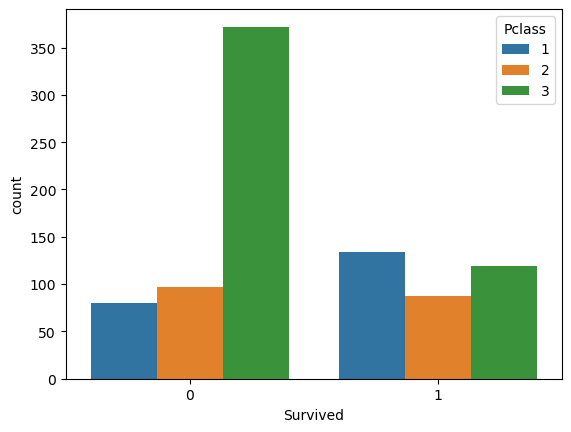

In [32]:
sns.countplot(x='Survived',hue='Pclass',data=df)

In [33]:
df['Family']=df['SibSp']+df['Parch']

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,C,0


In [35]:
df=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Family','Survived']]

In [36]:
df=pd.get_dummies(df,sparse=True)

In [37]:
df=df.astype(int)

In [38]:
df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Family,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7,0,1,0,0,1,0,0,1
1,1,38,1,0,71,1,1,1,1,0,1,0,0
2,3,26,0,0,7,0,0,1,1,0,0,0,1
3,1,35,1,0,53,1,1,1,1,0,0,0,1
4,3,35,0,0,8,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,0,0,0,0,1,0,0,1
887,1,19,0,0,30,1,0,1,1,0,0,0,1
888,3,29,1,2,23,0,3,0,1,0,0,0,1
889,1,26,0,0,30,1,0,1,0,1,1,0,0


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
s=StandardScaler()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_val,y_train,y_val=train_test_split(df.drop(columns='Survived'),df['Survived'],test_size=0.1,random_state=0)

In [43]:
X_train.shape

(800, 12)

In [44]:
X_val.shape

(89, 12)

In [45]:
X_train=s.fit_transform(X_train)
X_val=s.transform(X_val)

In [46]:
y_train

696    0
517    0
367    1
312    0
531    0
      ..
837    0
193    1
630    1
560    0
685    0
Name: Survived, Length: 800, dtype: int32

In [47]:
X_train

array([[ 0.81827698,  1.12321329, -0.48279748, ..., -0.48628803,
        -0.30723158,  0.61974434],
       [ 0.81827698, -0.02752175, -0.48279748, ..., -0.48628803,
         3.25487371, -1.61356859],
       [ 0.81827698, -0.02752175, -0.48279748, ...,  2.05639446,
        -0.30723158, -1.61356859],
       ...,
       [-1.59285225,  3.88497739, -0.48279748, ..., -0.48628803,
        -0.30723158,  0.61974434],
       [ 0.81827698, -0.02752175, -0.48279748, ..., -0.48628803,
         3.25487371, -1.61356859],
       [-0.38728763, -0.33438442,  0.41752416, ...,  2.05639446,
        -0.30723158, -1.61356859]])

In [48]:
import tensorflow as tf

In [49]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [50]:
model=Sequential()

In [51]:
model.add(Dense(10,activation='relu',input_dim=12))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.get_weights()

[array([[ 0.4536991 ,  0.41464186, -0.12419701,  0.31351352,  0.5196385 ,
         -0.3758257 ,  0.27383506,  0.09618896, -0.09945625,  0.36917174],
        [-0.30806285, -0.340811  ,  0.49881727, -0.05147916,  0.04799724,
         -0.30211478,  0.2964986 , -0.49173146,  0.09834051,  0.20023906],
        [ 0.25663882,  0.45751226,  0.08712775, -0.08505964, -0.08947092,
         -0.00498664,  0.41214168, -0.03781569, -0.4944956 , -0.11307094],
        [ 0.01382101, -0.10793027, -0.22946054,  0.45409644, -0.26083508,
          0.49167603,  0.48975486,  0.01451647,  0.28633624,  0.29081446],
        [-0.3587129 ,  0.341923  , -0.04713652,  0.05089885, -0.35548064,
         -0.09072921,  0.0647487 ,  0.17515028,  0.4068207 ,  0.0783326 ],
        [-0.14217627, -0.03026852,  0.27103966, -0.15386775, -0.38914406,
         -0.03175405,  0.08685809,  0.41845697,  0.22089726,  0.3298602 ],
        [ 0.28104508, -0.5165017 ,  0.40663183, -0.20369208,  0.4997037 ,
         -0.35785055,  0.4432978

In [54]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [55]:
model

In [56]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100


25/25 [==============================] - 1s 9ms/step - loss: 0.6777 - accuracy: 0.5863 - val_loss: 0.6744 - val_accuracy: 0.5843
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6488 - val_loss: 0.6621 - val_accuracy: 0.6067
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6725 - val_loss: 0.6480 - val_accuracy: 0.6067
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6224 - accuracy: 0.6750 - val_loss: 0.6350 - val_accuracy: 0.6180
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6010 - accuracy: 0.7063 - val_loss: 0.6239 - val_accuracy: 0.6404
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5852 - accuracy: 0.7225 - val_loss: 0.6134 - val_accuracy: 0.6404
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.7513 - val_loss: 0.6043 - val_accuracy: 0.6404
Epoch 8/100

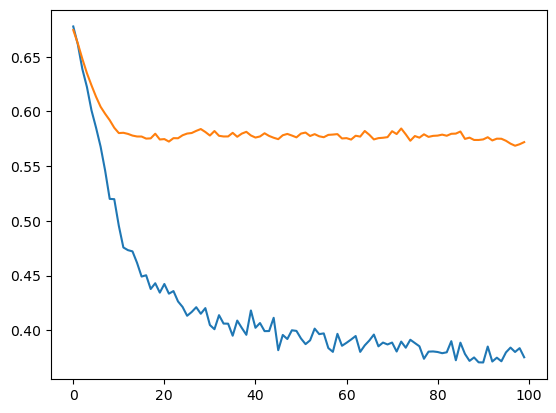

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

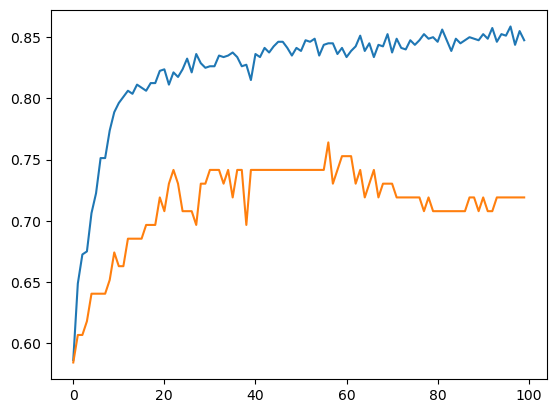

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [59]:
df_test.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [60]:
df_test['Cabin']=df_test['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [61]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,0,Q
1,3,female,47.0,1,0,7.0000,0,S
2,2,male,62.0,0,0,9.6875,0,Q
3,3,male,27.0,0,0,8.6625,0,S
4,3,female,22.0,1,1,12.2875,0,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,0,S
414,1,female,39.0,0,0,108.9000,1,C
415,3,male,38.5,0,0,7.2500,0,S
416,3,male,NaN,0,0,8.0500,0,S


In [62]:
k

KNNImputer(n_neighbors=3)

In [63]:
df_test['Age']=k.transform(df_test[['Age']])

In [64]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.500000,0,0,7.8292,0,Q
1,3,female,47.000000,1,0,7.0000,0,S
2,2,male,62.000000,0,0,9.6875,0,Q
3,3,male,27.000000,0,0,8.6625,0,S
4,3,female,22.000000,1,1,12.2875,0,S
...,...,...,...,...,...,...,...,...
413,3,male,29.699118,0,0,8.0500,0,S
414,1,female,39.000000,0,0,108.9000,1,C
415,3,male,38.500000,0,0,7.2500,0,S
416,3,male,29.699118,0,0,8.0500,0,S


In [65]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [66]:
df_test=df_test.dropna()

In [67]:
df_test['Family']=df_test['SibSp']+df_test['Parch']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25596\3650297672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Family']=df_test['SibSp']+df_test['Parch']


In [68]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,3,male,34.500000,0,0,7.8292,0,Q,0
1,3,female,47.000000,1,0,7.0000,0,S,1
2,2,male,62.000000,0,0,9.6875,0,Q,0
3,3,male,27.000000,0,0,8.6625,0,S,0
4,3,female,22.000000,1,1,12.2875,0,S,2
...,...,...,...,...,...,...,...,...,...
413,3,male,29.699118,0,0,8.0500,0,S,0
414,1,female,39.000000,0,0,108.9000,1,C,0
415,3,male,38.500000,0,0,7.2500,0,S,0
416,3,male,29.699118,0,0,8.0500,0,S,0


In [69]:
df_test=pd.get_dummies(df_test).astype(int)

In [70]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Cabin,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34,0,0,7,0,0,0,1,0,1,0
1,3,47,1,0,7,0,1,1,0,0,0,1
2,2,62,0,0,9,0,0,0,1,0,1,0
3,3,27,0,0,8,0,0,0,1,0,0,1
4,3,22,1,1,12,0,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,29,0,0,8,0,0,0,1,0,0,1
414,1,39,0,0,108,1,0,1,0,1,0,0
415,3,38,0,0,7,0,0,0,1,0,0,1
416,3,29,0,0,8,0,0,0,1,0,0,1


In [71]:
df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Family,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7,0,1,0,0,1,0,0,1
1,1,38,1,0,71,1,1,1,1,0,1,0,0
2,3,26,0,0,7,0,0,1,1,0,0,0,1
3,1,35,1,0,53,1,1,1,1,0,0,0,1
4,3,35,0,0,8,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,0,0,0,0,1,0,0,1
887,1,19,0,0,30,1,0,1,1,0,0,0,1
888,3,29,1,2,23,0,3,0,1,0,0,0,1
889,1,26,0,0,30,1,0,1,0,1,1,0,0


In [72]:
X_test=s.transform(df_test)

In [73]:
from xgboost import XGBClassifier

In [74]:
x=XGBClassifier()

In [75]:
params={'learning_rate':[0.001,0.05,0.1,0.25,0.5,1,1.2],'n_estimators':[10,20,50,100,120],'max_depth':[None,10,20,25]}


In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
g=GridSearchCV(x,param_grid=params,cv=10,n_jobs=-1,scoring='accuracy')

In [78]:
g.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.05, 0.1, 0.25, 0.5, 1, 1.2],
                         'max_depth': [None, 10, 20, 25],
                         'n_estimators': [10, 20, 50, 100, 120]},
             scoring='accuracy')

In [79]:
best=g.best_params_

In [80]:
best

{'learning_rate': 0.05, 'max_depth': None, 'n_estimators': 120}

In [81]:
xg=XGBClassifier(**best)

In [82]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
y_pred=xg.predict(X_val)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [85]:
a=accuracy_score(y_val,y_pred)

In [86]:
df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Family',
       'Survived', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [87]:
y=df['Survived']

In [88]:
y_prediction=xg.predict(df.drop(columns='Survived'))

In [89]:
c=confusion_matrix(y,y_prediction)

In [90]:
cm=ConfusionMatrixDisplay(c,display_labels=xg.classes_)

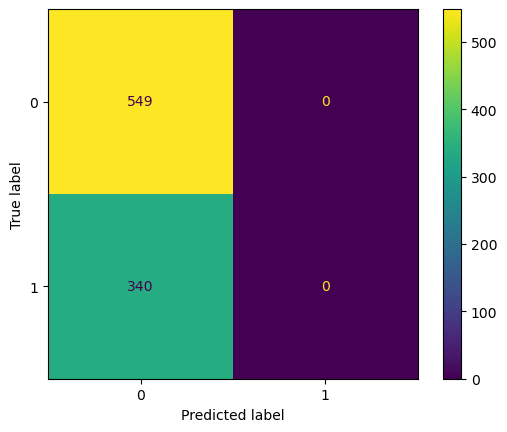

In [91]:
cm.plot()

In [92]:
c

array([[549,   0],
       [340,   0]], dtype=int64)

In [93]:
accuracy_score(y,y_prediction)

0.6175478065241845

In [94]:
y_pred2=model.predict(df.drop(columns='Survived'))

28/28 [==============================] - 0s 2ms/step


In [95]:
thresh=0.5

In [96]:
binary_pred=(y_pred2>thresh).astype(int)

In [97]:
len(y_pred2)

889

In [98]:
len(binary_pred)

889

In [99]:
c=confusion_matrix(y,binary_pred)

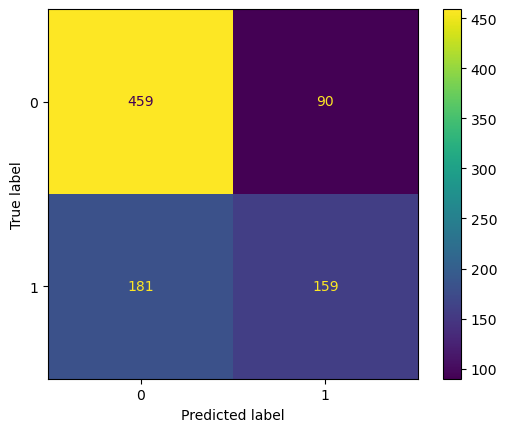

In [100]:
ConfusionMatrixDisplay(c).plot()

In [101]:
accuracy_score(y,binary_pred)

0.6951631046119235

In [102]:
df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Family,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7,0,1,0,0,1,0,0,1
1,1,38,1,0,71,1,1,1,1,0,1,0,0
2,3,26,0,0,7,0,0,1,1,0,0,0,1
3,1,35,1,0,53,1,1,1,1,0,0,0,1
4,3,35,0,0,8,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,0,0,0,0,1,0,0,1
887,1,19,0,0,30,1,0,1,1,0,0,0,1
888,3,29,1,2,23,0,3,0,1,0,0,0,1
889,1,26,0,0,30,1,0,1,0,1,1,0,0


In [103]:
df=df.drop(columns=['Sex_male','Embarked_S'])
df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Family,Survived,Sex_female,Embarked_C,Embarked_Q
0,3,22,1,0,7,0,1,0,0,0,0
1,1,38,1,0,71,1,1,1,1,1,0
2,3,26,0,0,7,0,0,1,1,0,0
3,1,35,1,0,53,1,1,1,1,0,0
4,3,35,0,0,8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,0,0,0,0,0,0
887,1,19,0,0,30,1,0,1,1,0,0
888,3,29,1,2,23,0,3,0,1,0,0
889,1,26,0,0,30,1,0,1,0,1,0


In [104]:
xgb=XGBClassifier()
from mlxtend.feature_selection import ExhaustiveFeatureSelector
efs=ExhaustiveFeatureSelector(xgb,min_features=5,max_features=8,scoring='accuracy',cv=10)
efs.fit(df.drop(columns='Survived'),df['Survived'])

Features: 627/627

ExhaustiveFeatureSelector(cv=10,
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learn...
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9]],
                          max_features=8, min_features=5)

In [106]:
efs.best_score_

0.8335163432073545

In [107]:
efs.best_idx_

(0, 1, 2, 7, 9)

In [108]:
X_train

array([[ 0.81827698,  1.12321329, -0.48279748, ..., -0.48628803,
        -0.30723158,  0.61974434],
       [ 0.81827698, -0.02752175, -0.48279748, ..., -0.48628803,
         3.25487371, -1.61356859],
       [ 0.81827698, -0.02752175, -0.48279748, ...,  2.05639446,
        -0.30723158, -1.61356859],
       ...,
       [-1.59285225,  3.88497739, -0.48279748, ..., -0.48628803,
        -0.30723158,  0.61974434],
       [ 0.81827698, -0.02752175, -0.48279748, ..., -0.48628803,
         3.25487371, -1.61356859],
       [-0.38728763, -0.33438442,  0.41752416, ...,  2.05639446,
        -0.30723158, -1.61356859]])

In [109]:
xgb2=XGBClassifier()
from mlxtend.feature_selection import ExhaustiveFeatureSelector
efs2=ExhaustiveFeatureSelector(xgb2,min_features=5,max_features=8,scoring='accuracy',cv=10)
efs2.fit(X_train,y_train)

Features: 3000/3003IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [112]:
efs2.best_idx_

(0, 1, 3, 4, 5, 7)

In [118]:
efs2.best_score_

0.8550000000000001

In [119]:
from mlxtend.plotting import plot_decision_regions

In [122]:
from sklearn.decomposition import PCA

In [123]:
p=PCA(n_components=2)

In [126]:
X_train_red=X_train[:,[0,1,3,4,5,7]]
X_train_pca=p.fit_transform(X_train_red)

In [127]:
X_train_red

array([[ 0.81827698,  1.12321329, -0.46698854, -0.4665475 , -0.53688431,
        -0.73178456],
       [ 0.81827698, -0.02752175, -0.46698854, -0.14908389, -0.53688431,
        -0.73178456],
       [ 0.81827698, -0.02752175, -0.46698854, -0.48638897, -0.53688431,
         1.36652242],
       ...,
       [-1.59285225,  3.88497739, -0.46698854, -0.03003503,  1.86259865,
        -0.73178456],
       [ 0.81827698, -0.02752175, -0.46698854, -0.48638897, -0.53688431,
        -0.73178456],
       [-0.38728763, -0.33438442,  1.99895754,  0.1882212 , -0.53688431,
        -0.73178456]])

In [128]:
clf=XGBClassifier()
clf.fit(X_train_pca,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: >

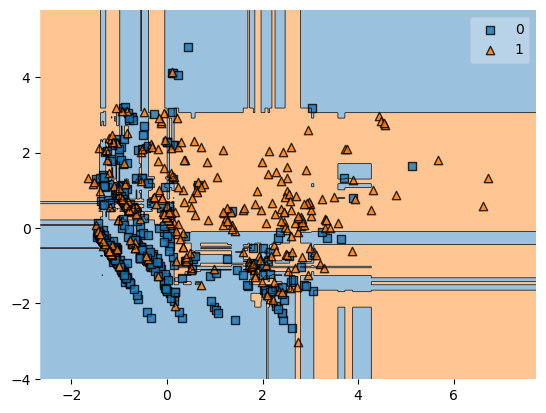

In [130]:
plot_decision_regions(X_train_pca,np.array(y_train),clf)

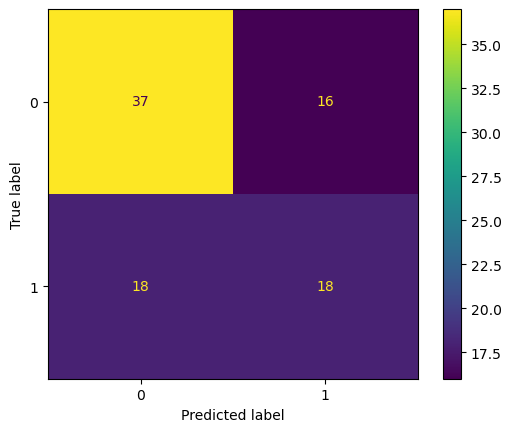

In [134]:
ConfusionMatrixDisplay(confusion_matrix(y_val,clf.predict(p.transform(X_val[:,[0,1,3,4,5,7]]))),display_labels=clf.classes_).plot()

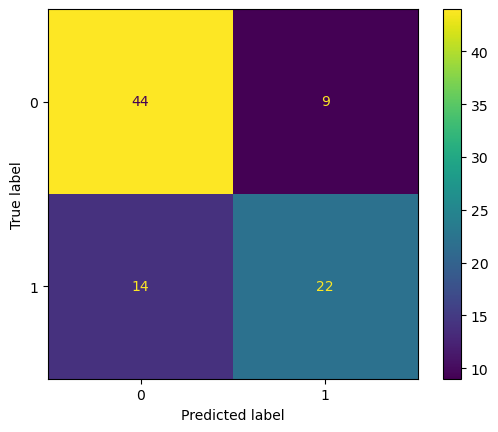

In [138]:
xgb3=XGBClassifier()
xgb3.fit(X_train_red,y_train)
ConfusionMatrixDisplay(confusion_matrix(y_val,xgb3.predict(X_val[:,[0,1,3,4,5,7]])),display_labels=xgb3.classes_).plot()

In [139]:
X_train.shape

(800, 12)

In [140]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [141]:
params={'C':[0.0001,0.001,0.01,0.5,0.1,0.25,0.5,1],'penalty':['l1','l2'],'solver':['lbfgs','liblinear','newton-cholesky']}

In [142]:
grid=GridSearchCV(l,param_grid=params,cv=10,n_jobs=-1)

In [143]:
X_train_red

array([[ 0.81827698,  1.12321329, -0.46698854, -0.4665475 , -0.53688431,
        -0.73178456],
       [ 0.81827698, -0.02752175, -0.46698854, -0.14908389, -0.53688431,
        -0.73178456],
       [ 0.81827698, -0.02752175, -0.46698854, -0.48638897, -0.53688431,
         1.36652242],
       ...,
       [-1.59285225,  3.88497739, -0.46698854, -0.03003503,  1.86259865,
        -0.73178456],
       [ 0.81827698, -0.02752175, -0.46698854, -0.48638897, -0.53688431,
        -0.73178456],
       [-0.38728763, -0.33438442,  1.99895754,  0.1882212 , -0.53688431,
        -0.73178456]])

In [144]:
grid.fit(X_train_red,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueEr

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.5, 0.1, 0.25, 0.5, 1],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky']})

In [145]:
bp=grid.best_params_

In [146]:
l=LogisticRegression(**bp)

In [147]:
l.fit(X_train_red,y_train)
lr_pred=l.predict(X_val[:,[0,1,3,4,5,7]])

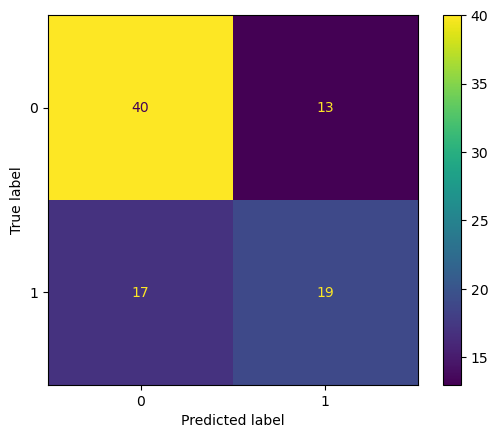

In [149]:
ConfusionMatrixDisplay(confusion_matrix(y_val,lr_pred),display_labels=l.classes_).plot()

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [152]:
p={'n_estimators':[1,5,10,20,50,100,120],'max_depth':[2,5,10,12,20,None]}

In [153]:
grf=GridSearchCV(rf,param_grid=p,cv=10,n_jobs=-1,verbose=2)

In [154]:
grf.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 12, 20, None],
                         'n_estimators': [1, 5, 10, 20, 50, 100, 120]},
             verbose=2)

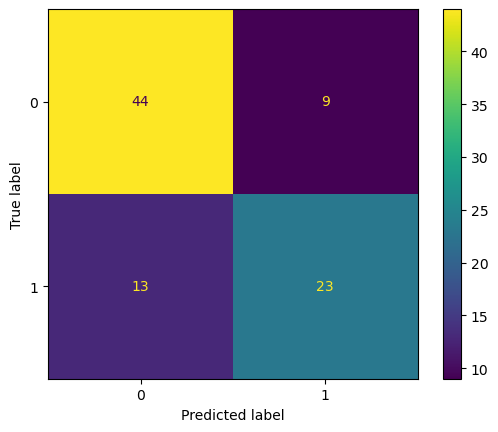

In [156]:
rf_gs=RandomForestClassifier(**grf.best_params_)
rf_gs.fit(X_train,y_train)
ConfusionMatrixDisplay(confusion_matrix(y_val,rf_gs.predict(X_val)),display_labels=rf_gs.classes_).plot()

In [158]:
rf_gs.feature_importances_

array([0.08367582, 0.19108177, 0.0327326 , 0.02587433, 0.17150999,
       0.05016245, 0.05872817, 0.16883457, 0.17659375, 0.01402981,
       0.00850904, 0.0182677 ])

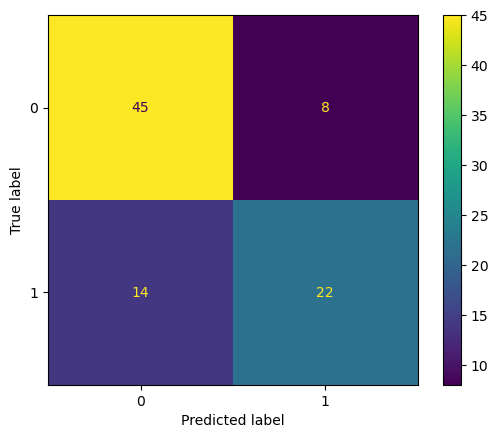

In [160]:
X_train_rf=X_train[:,[0,1,4,5,6,7,8]]
X_val_rf=X_val[:,[0,1,4,5,6,7,8]]
r=RandomForestClassifier(**grf.best_params_)
r.fit(X_train_rf,y_train)
ConfusionMatrixDisplay(confusion_matrix(y_val,r.predict(X_val_rf)),display_labels=r.classes_).plot()